In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sales = pd.read_csv('/content/Advertising.csv')

In [ ]:
sales.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
sales.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
sales.shape

(200, 5)

In [ ]:
sales.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
#checking for null values
sales.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
#checking for any duplicates
sales.duplicated().sum()

0

In [ ]:
#check for unique values
sales.nunique()

,0
Unnamed: 0,200
TV,190
Radio,167
Newspaper,172
Sales,121


In [ ]:
sales.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
#drop columns
sales.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


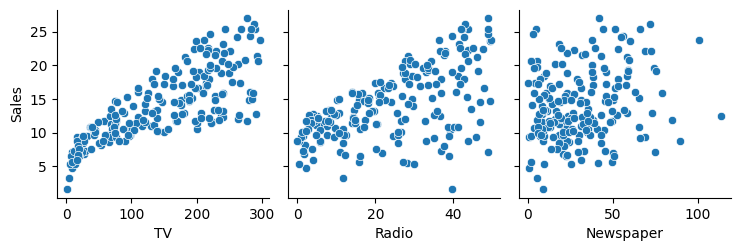

In [ ]:
sns.pairplot( data = sales, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales')
plt.show()

In [ ]:
sales.shape

(200, 4)

Text(0, 0.5, 'Sales')

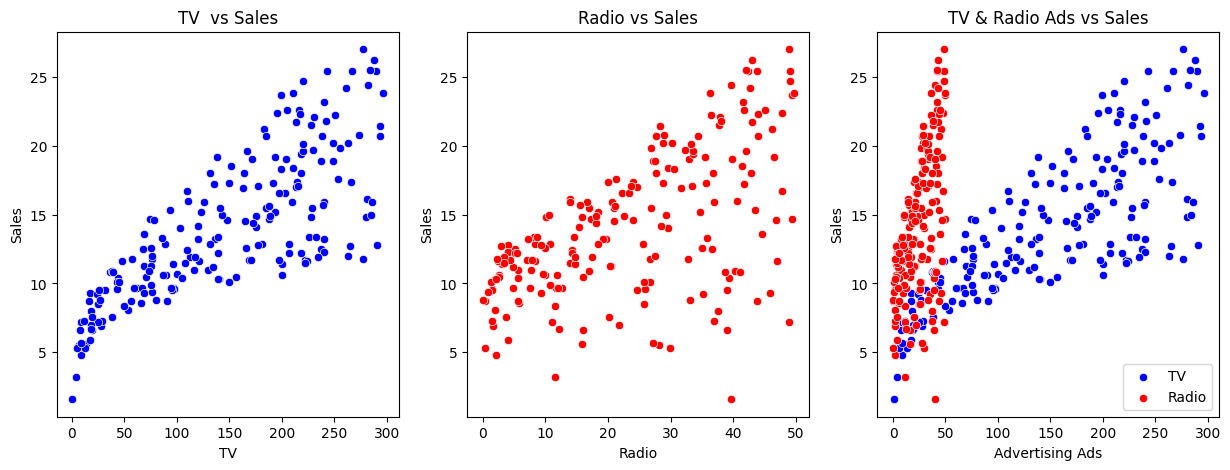

In [ ]:
#Visualizing the data
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: TV vs Sales
sns.scatterplot(x='TV', y='Sales', data=sales, ax=axs[0], color='blue')
axs[0].set_title('TV  vs Sales')
axs[0].set_xlabel('TV')
axs[0].set_ylabel('Sales')

# Plot 2: Radio vs Sales
sns.scatterplot(x='Radio', y='Sales', data=sales, ax=axs[1], color='red')
axs[1].set_title('Radio vs Sales')
axs[1].set_xlabel('Radio')
axs[1].set_ylabel('Sales')

# Plot 3: Combined Effect (TV + Radio vs Sales)
sns.scatterplot(x='TV', y='Sales', data=sales, ax=axs[2], color='blue', label='TV')
sns.scatterplot(x='Radio', y='Sales', data=sales, ax=axs[2], color='red', label='Radio')
axs[2].set_title('TV & Radio Ads vs Sales')
axs[2].set_xlabel('Advertising Ads')
axs[2].set_ylabel('Sales')

General Observations:

TV advertising shows a stronger and more consistent relationship with increasing sales, making it a potentially more reliable investment.

Radio advertising, while also effective, shows more variability and might require more careful targeting or strategy adjustments to maximize returns.

When considering both together, focusing more on TV might yield more
predictable sales increases, while Radio could serve as supplementary advertising.

In [ ]:
sales.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


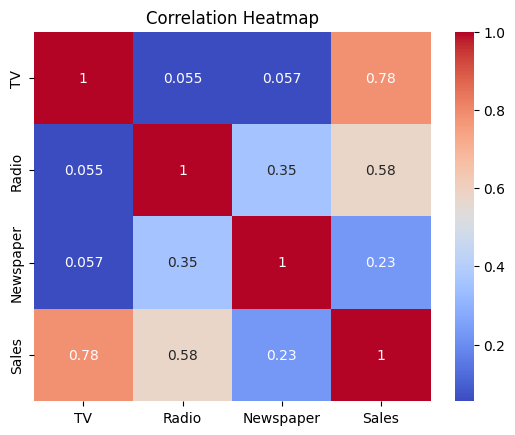

In [ ]:
sns.heatmap(sales.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Coefficients: [0.04472952 0.18919505 0.00276111]
Intercept: 2.979067338122629
Mean Squared Error: 3.1740973539761033
R-squared: 0.899438024100912


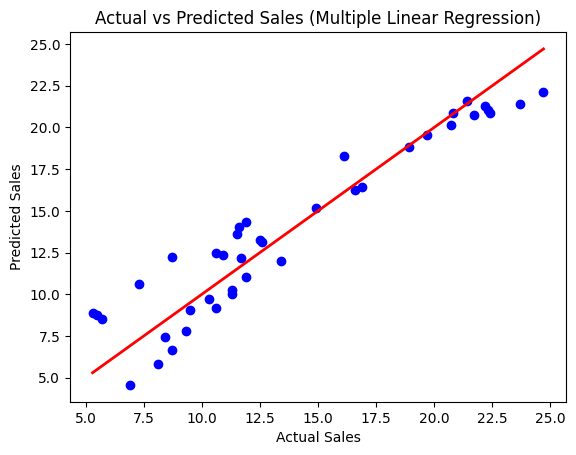

In [ ]:
# Define the features and the target variable
X = sales[['TV', 'Radio', 'Newspaper']]  # Features
y = sales['Sales']                        # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print results
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

# Optional: Plotting actual vs predicted sales
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # 45-degree line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Multiple Linear Regression)")
plt.show()


The results from multiple linear regression model reveal strong relationships between sales and the three advertising mediums.

TV and Radio advertising have significant positive impacts on sales, while the effect of Newspaper spending is negligible.

With an R² of nearly 0.90, the model explains a significant portion of the variance in sales, making it a robust predictor.

The MSE indicates that the average squared difference between the predicted and actual sales is approximately 3.17 units. This is a relatively low value, suggesting good accuracy in predictions.